In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
# Checking the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Checking the shape of dataset(Rows and Columns)
df.shape

(48895, 16)

In [5]:
# Checking the presence of null values in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Checking for duplicate values in the dataset
df.duplicated().sum()

0

In [7]:
# Filling missing values with "Unknown"
df['name'].fillna('Unknown', inplace = True)
df['host_name'].fillna('Unknown', inplace = True)

In [8]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
47931,35994335,Riverside Drive Apartment,59181407,Pierre-Marc,Manhattan,Washington Heights,40.83573,-73.94895,Entire home/apt,129,31,0,NaN,NaN,1,306
16772,13395084,Family getaway.,74789787,Sabina,Brooklyn,Clinton Hill,40.69558,-73.96872,Private room,100,7,2,2016-08-13,0.06,1,0
6782,4853647,Modern & luxurious close to trains,6162041,Nick,Queens,Ozone Park,40.68559,-73.84960,Entire home/apt,99,2,129,2019-06-30,2.33,1,344
6951,4983264,Comfortable room steps from Central Park,25688822,Lucie,Manhattan,Harlem,40.79967,-73.95444,Private room,95,3,70,2019-06-30,1.38,1,117
15774,12755571,Studio in the heart of Manhattan,69384130,Nina,Manhattan,Midtown,40.75227,-73.97351,Entire home/apt,143,1,1,2016-05-13,0.03,1,0
8063,6224336,"5 min from midtown, but peaceful.",32279718,Mike,Queens,Long Island City,40.74253,-73.95490,Entire home/apt,153,4,77,2019-06-02,1.62,1,252
26385,21012137,"Comfortable bed, lighting, fresh linens, works...",66329,Collin,Brooklyn,Fort Greene,40.68634,-73.97388,Private room,119,1,14,2019-06-04,0.64,2,78
48374,36227884,New York Guest House Private Shared Room,272477673,Jin,Manhattan,Chelsea,40.74714,-73.99117,Shared room,67,1,0,NaN,NaN,3,323
25120,20131833,"Designer Chelsea Loft: 2 bedrooms, 2 bathrooms",24050287,Daniel,Manhattan,Chelsea,40.74707,-74.00332,Entire home/apt,500,7,26,2019-05-23,1.25,1,214
36603,29101938,The Bronx Studio,219330285,Janice,Bronx,Wakefield,40.89385,-73.84480,Entire home/apt,80,3,6,2018-12-31,0.71,1,0


In [9]:
# Filling missing values with "No Reviews" and "0" as negative values doesnt mean any sense
df['last_review'].fillna('No Reviews', inplace = True)
df['reviews_per_month'].fillna(0, inplace = True)

In [10]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [11]:
# Checking all missing values are handled properly
print("Missing data after filling:")
print(df.isnull().sum())

Missing data after filling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [12]:
# Checking if there are any negative or zero prices
invalid_price_rows = df[df['price'] <= 0]
print(f"Listings with invalid (zero or negative) price: {invalid_price_rows.shape[0]}")

Listings with invalid (zero or negative) price: 11


In [13]:
# Checking for negative values in minimum nights (although zero might be valid, negative doesn't make sense)
invalid_min_nights_rows = df[df['minimum_nights'] < 0]
print(f"Listings with invalid minimum nights: {invalid_min_nights_rows.shape[0]}")

Listings with invalid minimum nights: 0


In [14]:
#Removing rows with invalid prices (price = 0)
df_cleaned = df[df['price'] > 0]
df_cleaned

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Reviews,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,No Reviews,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,No Reviews,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,No Reviews,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,No Reviews,0.00,6,2


In [15]:
# Descriptive statistics to identify possible outliers
price_stats = df_cleaned['price'].describe()
min_nights_stats = df_cleaned['minimum_nights'].describe()
print(price_stats)
print(min_nights_stats)

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


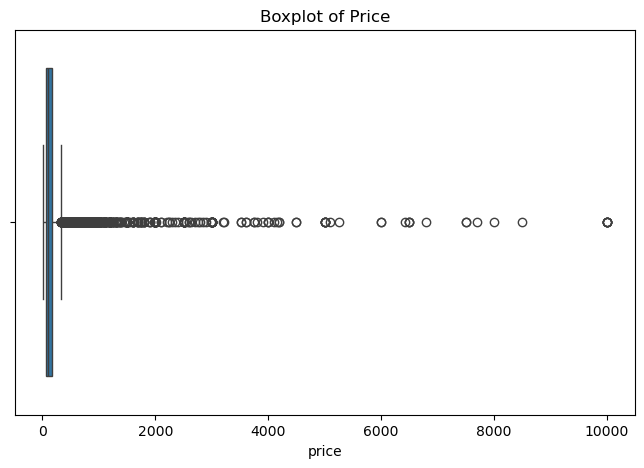

In [16]:
# Visualize possible outliers using IQR (Interquartile Range)
plt.figure(figsize = (8, 5))
sns.boxplot(x = df_cleaned['price'])
plt.title('Boxplot of Price')
plt.show()

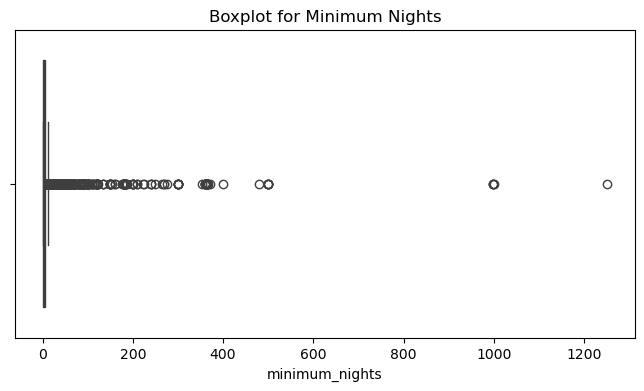

In [17]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = df_cleaned['minimum_nights'])
plt.title("Boxplot for Minimum Nights")
plt.show()

In [18]:
# Price Outliers using IQR
Q1_price = df_cleaned['price'].quantile(0.25)
Q3_price = df_cleaned['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
print("Interquartile Range for price:", IQR_price)

Interquartile Range for price: 106.0


In [19]:
# Minimum Nights Outliers using IQR
Q1_nights = df_cleaned['minimum_nights'].quantile(0.25)
Q3_nights = df_cleaned['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
print("Interquartile Range for minimum nights:", IQR_nights)

Interquartile Range for minimum nights: 4.0


In [20]:
price_outliers = df_cleaned[(df_cleaned['price'] < (Q1_price - 1.5 * IQR_price)) | 
                            (df_cleaned['price'] > (Q3_price + 1.5 * IQR_price))]

In [21]:
nights_outliers = df_cleaned[(df_cleaned['minimum_nights'] < (Q1_nights - 1.5 * IQR_nights)) |
                             (df_cleaned['minimum_nights'] > (Q3_nights + 1.5 * IQR_nights))]

In [22]:
print(f"Number of outliers in 'price': {price_outliers.shape[0]}")
print(f"Number of outliers in 'minimum_nights': {nights_outliers.shape[0]}")

Number of outliers in 'price': 2972
Number of outliers in 'minimum_nights': 6605


In [23]:
# Standardization - making sure numeric columns are in correct data types and ranges
df_final = df_cleaned[~df_cleaned.index.isin(price_outliers.index)]
df_final = df_final[~df_final.index.isin(nights_outliers.index)]

In [24]:
print(df_final.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


CONCLUSION
This comprehensive data cleaning process is crucial for ensuring that any insights or models built from the data are reliable and accurate. Through this project, I’ve enhanced my data analysis skills and learned the importance of data integrity and outlier detection in real-world datasets.